In [1]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [3]:
import aiohttp
import asyncio


async def download(url, filename):
    async with aiohttp.ClientSession() as session:
        async with session.get(url) as response:
            if response.status == 200:
                with open(filename, "wb") as f:
                    f.write(await response.read())
                print(f"Downloaded {filename}")
            else:
                print(f"Failed to download {url}. Status code: {response.status}")


In [4]:
filepath='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'

In [5]:
await download(filepath, "housing.csv")
file_name="housing.csv"

Downloaded housing.csv


In [6]:
df = pd.read_csv(file_name)

In [7]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [9]:
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)

In [10]:
print(df.describe())

              price      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.161300e+04  21600.000000  21603.000000  21613.000000  2.161300e+04   
mean   5.400881e+05      3.372870      2.115736   2079.899736  1.510697e+04   
std    3.671272e+05      0.926657      0.768996    918.440897  4.142051e+04   
min    7.500000e+04      1.000000      0.500000    290.000000  5.200000e+02   
25%    3.219500e+05      3.000000      1.750000   1427.000000  5.040000e+03   
50%    4.500000e+05      3.000000      2.250000   1910.000000  7.618000e+03   
75%    6.450000e+05      4.000000      2.500000   2550.000000  1.068800e+04   
max    7.700000e+06     33.000000      8.000000  13540.000000  1.651359e+06   

             floors    waterfront          view     condition         grade  \
count  21613.000000  21613.000000  21613.000000  21613.000000  21613.000000   
mean       1.494309      0.007542      0.234303      3.409430      7.656873   
std        0.539989      0.086517      0.766318    

In [12]:
floor_counts = df["floors"].value_counts().to_frame()

floor_counts.columns = ["Count"]

print(floor_counts)


        Count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


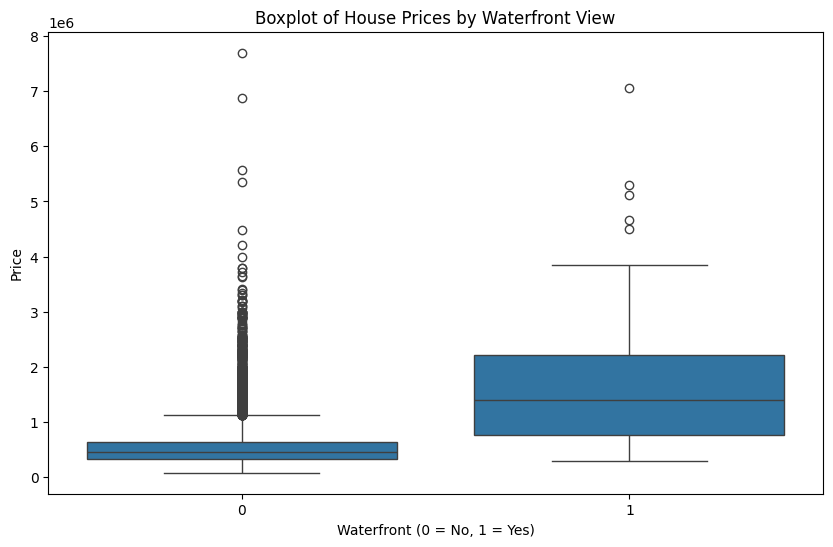

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='waterfront', y='price')
plt.title('Boxplot of House Prices by Waterfront View')
plt.xlabel('Waterfront (0 = No, 1 = Yes)')
plt.ylabel('Price')
plt.show()

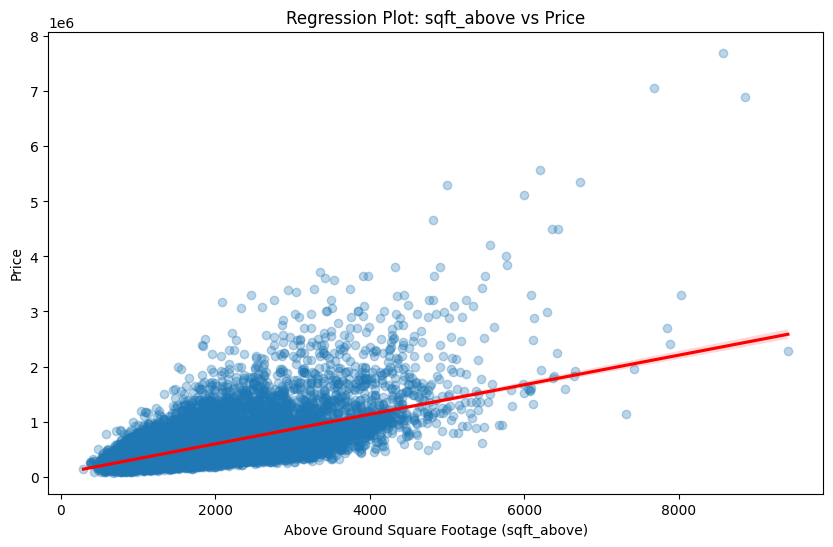

In [14]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='sqft_above', y='price', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Regression Plot: sqft_above vs Price')
plt.xlabel('Above Ground Square Footage (sqft_above)')
plt.ylabel('Price')
plt.show()

In [17]:
from sklearn.linear_model import LinearRegression

X = df[['sqft_living']]  
Y = df['price']   

lm = LinearRegression()
lm.fit(X, Y)

r2_score_long = lm.score(X, Y)

print(f"R^2 score: {r2_score_long:.4f}")


R^2 score: 0.4929


In [19]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]

df_cleaned = df[features + ['price']].dropna()

X = df_cleaned[features]
Y = df_cleaned['price']

lm = LinearRegression()
lm.fit(X, Y)

r2_features = lm.score(X, Y)

print(f"R^2 score: {r2_features:.4f}")


R^2 score: 0.6576


In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score

preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), features),  
    ],
    remainder="passthrough"
)

# Define the full pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("scaler", StandardScaler()),  
    ("regressor", LinearRegression()) 
])

# Prepare data
X = df[features]
Y = df["price"]

# Fit the pipeline
pipeline.fit(X, Y)

# Predict and calculate R^2 score
Y_pred = pipeline.predict(X)
r2_pipeline = r2_score(Y, Y_pred)

print(f"R^2 score: {r2_pipeline:.4f}")

R^2 score: 0.6577


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

X = df[features]
Y = df["price"]

X = X.fillna(X.mean())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

ridge = Ridge(alpha=0.1) 
ridge.fit(X_train, Y_train)

Y_pred = ridge.predict(X_test)

r2_ridge = r2_score(Y_test, Y_pred)

print(f"R^2 score (Ridge Regression): {r2_ridge:.4f}")

R^2 score (Ridge Regression): 0.6479


In [28]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score


X = df[features]
Y = df["price"]

X = X.fillna(X.mean())

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=1)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

ridge = Ridge(alpha=0.1)  
ridge.fit(X_train_poly, Y_train)

Y_pred = ridge.predict(X_test_poly)

r2_ridge_poly = r2_score(Y_test, Y_pred)

print(f"R^2 score (Ridge Regression with Polynomial Features): {r2_ridge_poly:.4f}")


R^2 score (Ridge Regression with Polynomial Features): 0.7003
